In [ ]:
# KNN - K Nearest Neighbour

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [75]:
data = np.load('./datasets/mnist_train_small.npy')

In [8]:
data.shape

(19999, 785)

In [77]:
X = data[:,1:]
y = data[:,0]

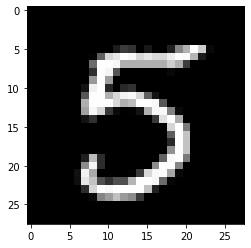

In [78]:
plt.imshow(X[0].reshape(28,28),cmap='gray')

In [10]:
y[0]

5

In [41]:
# X, y = make_blobs(n_samples=100,centers =3,random_state=42)

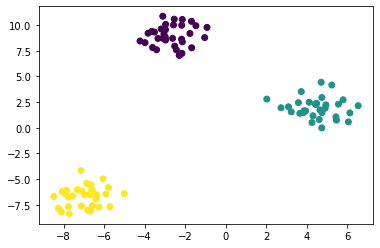

In [42]:
# plt.scatter(X[:,0],X[:,1],c=y)

In [43]:
# X[:5],y[:5]

(array([[-7.72642091, -8.39495682],
        [ 5.45339605,  0.74230537],
        [-2.97867201,  9.55684617],
        [ 6.04267315,  0.57131862],
        [-6.52183983, -6.31932507]]),
 array([2, 1, 0, 1, 2]))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
X_train.shape,y_train.shape
X_test.shape,y_test.shape

((6600, 784), (6600,))

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
model = KNeighborsClassifier()

In [17]:
#training model happens in fit function
#plotting points on the graph
#no work happening in training knn model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [19]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [20]:
model.score(X_test[:1000],y_test[:1000])

0.946

Custom KNN - Our own KNN implementation from scratch!

In [83]:
class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)
    
    

In [86]:
m2 = CustomKNN()

In [87]:
m2.fit(X_train,y_train)

In [88]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [89]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [93]:
m2.score(X_test[:100], y_test[:100])

0.95